<a href="https://colab.research.google.com/github/Mbigdeli2003/DNN_training/blob/main/NN_session2_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##کلاس (Class):
•	کلاس‌ها نوعی قالب یا طرح کلی برای ایجاد اشیا هستند. هر کلاس می‌تواند ویژگی‌ها (خصوصیات) و رفتارها (متدها) داشته باشد.

•	مثال: فرض کنید می‌خواهیم یک مدل شبکه عصبی تعریف کنیم. کلاس شبکه عصبی شامل ویژگی‌هایی مانند تعداد لایه‌ها و متدهایی مانند "پیش‌روی مدل" است.

##اشیا (Objects):
•	یک شیء نمونه‌ای از یک کلاس است. وقتی از یک کلاس استفاده می‌کنیم تا یک شیء جدید بسازیم، این شیء تمامی ویژگی‌ها و متدهای تعریف‌شده در کلاس را به ارث می‌برد.
•	مثال:
اگر یک کلاس
MLPModel تعریف کنیم، هر نمونه‌ای از این کلاس یک مدل شبکه عصبی چند لایه (MLP) جدید خواهد بود.


## متدها (Methods):
•	متدها توابعی هستند که درون یک کلاس تعریف می‌شوند و به اشیا امکان می‌دهند تا با داده‌ها یا ویژگی‌های خود کار کنند. به عبارتی، متدها رفتارهای کلاس را مشخص می‌کنند.
•	مثال: متدی که مسئول پیش‌روی داده‌ها در یک شبکه عصبی است، یک متد درون کلاس شبکه عصبی محسوب می‌شود


##سازنده‌ها (Constructors):
•	سازنده‌ها متدهایی هستند که هنگام ایجاد یک شیء جدید از کلاس فراخوانی می‌شوند. معمولاً سازنده‌ها برای مقداردهی اولیه ویژگی‌های یک شیء استفاده می‌شوند.
•	مثال: در کد شبکه عصبی، سازنده برای تعریف لایه‌های شبکه استفاده می‌شود.


##  وراثت (Inheritance):
•	وراثت به ما اجازه می‌دهد که یک کلاس جدید از یک کلاس دیگر ایجاد کنیم و تمامی ویژگی‌ها و متدهای آن را به ارث ببریم. این ویژگی به ما کمک می‌کند تا کد را مجدداً استفاده کنیم.


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 52713425.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1750768.81it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 12519761.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3951572.03it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



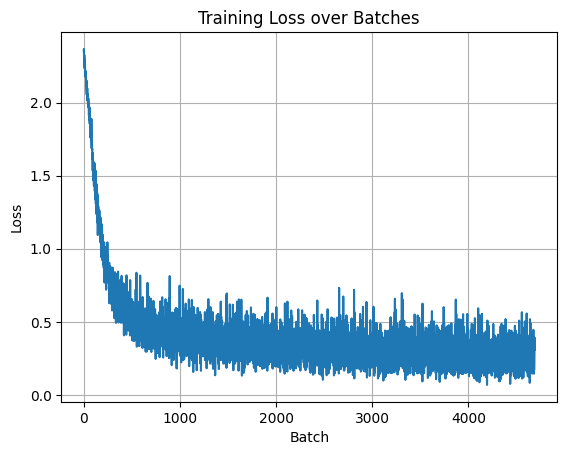

Accuracy: 92.47%


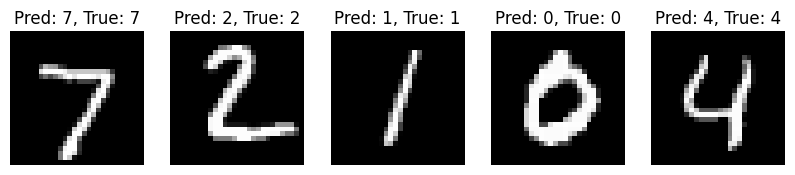

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# استفاده از GPU اگر در دسترس باشد
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# تعریف کلاس برای مدل MLP
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # لایه اول: ورودی به لایه مخفی
        self.relu = nn.ReLU()  # تابع فعال‌سازی ReLU
        self.fc2 = nn.Linear(hidden_size, output_size)  # لایه دوم: لایه مخفی به خروجی

    def forward(self, x):
        x = self.fc1(x)  # عبور از لایه اول
        x = self.relu(x)  # اعمال ReLU
        x = self.fc2(x)  # عبور از لایه دوم
        return x

# ایجاد شیء از کلاس مدل و انتقال آن به دستگاه (CPU یا GPU)
input_size = 28 * 28  # تعداد پیکسل‌های ورودی
hidden_size = 128  # تعداد نرون‌های لایه مخفی
output_size = 10  # تعداد کلاس‌های MNIST
model = MLPModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)

# بارگذاری داده‌ها
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# تابع آموزش با ذخیره مقادیر خطا برای هر batch
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    losses = []  # لیست برای ذخیره مقدار خطاها
    for epoch in range(num_epochs):
        for images, labels in train_loader:
            # انتقال داده‌ها به دستگاه (GPU یا CPU)
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)

            # محاسبه پیش‌روی شبکه (Forward pass)
            outputs = model(images)
            loss = criterion(outputs, labels)  # محاسبه مقدار خطا

            # پاک کردن گرادیان‌های قبلی
            optimizer.zero_grad()

            # محاسبه پس‌انتشار (Backward pass) و به‌روزرسانی وزن‌ها
            loss.backward()
            optimizer.step()

            # ذخیره مقدار خطا برای هر batch
            losses.append(loss.item())

    return losses  # بازگشت لیست خطاها برای رسم نمودار

# تعریف تابع خطا (CrossEntropyLoss) و بهینه‌ساز (SGD)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# آموزش مدل و ذخیره مقادیر خطا
num_epochs = 5
losses = train_model(model, train_loader, criterion, optimizer, num_epochs)

# رسم نمودار خطا بر حسب تعداد batch‌ها
plt.plot(range(1, len(losses) + 1), losses)
plt.title('Training Loss over Batches')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# تابع تست مدل و تجسم پیش‌بینی‌ها
def test_model(model, test_loader):
    correct = 0
    total = 0
    images_list = []
    predicted_list = []
    label_list = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 28 * 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # ذخیره چند نمونه از تصاویر برای نمایش
            images_list.extend(images.view(-1, 28, 28)[:5].cpu())  # تبدیل به 28x28 برای نمایش
            predicted_list.extend(predicted[:5].cpu())  # پیش‌بینی‌های مدل
            label_list.extend(labels[:5].cpu())  # برچسب‌های اصلی

    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy}%')

    # تجسم تعدادی از تصاویر به همراه پیش‌بینی‌ها و برچسب‌های اصلی
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(images_list[i], cmap='gray')
        axes[i].set_title(f'Pred: {predicted_list[i].item()}, True: {label_list[i].item()}')
        axes[i].axis('off')
    plt.show()

# تست مدل و نمایش تصاویر پیش‌بینی شده
test_model(model, test_loader)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


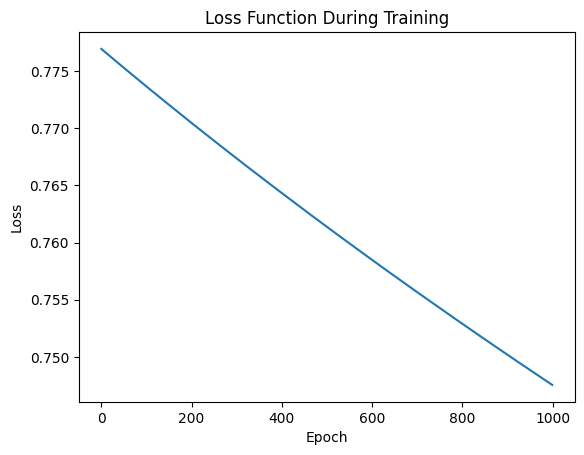

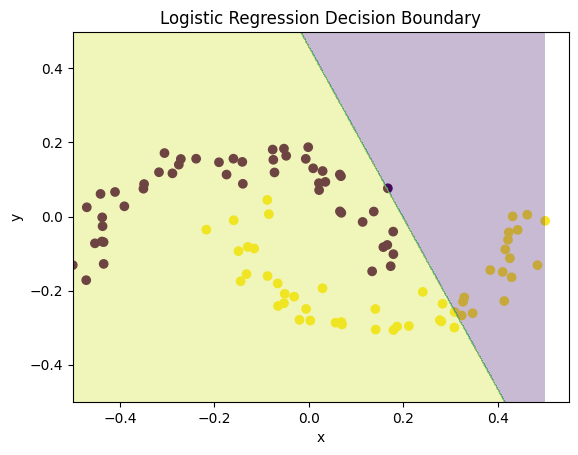

In [5]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
data = np.load('/content/drive/MyDrive/2d_pcl_dataset.npz')


X = torch.from_numpy(data['X']).float()
y = torch.from_numpy(data['y']).long()

# Define the logistic regression model
model = torch.nn.Linear(2, 2)
# # تعریف مدل MLP
# model = torch.nn.Sequential(
#     torch.nn.Linear(2, 16),
#     torch.nn.Sigmoid(),
#     torch.nn.Linear(16, 1),
#     torch.nn.Sigmoid()
# )
# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Train the model and track loss values
num_epochs = 1000
loss_values = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Track loss values for plotting
    loss_values.append(loss.item())

# Visualize the loss function during iterations
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()

# Visualize the results
x_range = np.arange(-0.5, 0.5, 0.002)
y_range = np.arange(-0.5, 0.5, 0.002)
xx, yy = np.meshgrid(x_range, y_range)
xy_pairs = np.column_stack([xx.ravel(), yy.ravel()])
xy_pairs_tensor = torch.from_numpy(xy_pairs).float()
with torch.no_grad():
    predictions = model(xy_pairs_tensor).argmax(dim=1).numpy().reshape(xx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y.numpy())
plt.contourf(xx, yy, predictions, alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Decision Boundary')
plt.show()
